## Sales & Client Services Survey Explore

Entries: 39946

- 1) What does the data tell us?
- 2) Demographics
- 3) What is the postive vs negative survey rate

What can we do to improve the data? What should we implement to make the company run the SCS and analysis easier?

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("SCS Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39946 entries, 0 to 39945
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   SCS ID                       39946 non-null  int64 
 1   SCS Respid                   39946 non-null  int64 
 2   Combined Interview End Date  39946 non-null  object
 3   SCS Primary Reason           39946 non-null  object
 4   SCS Primary Reason Other     39946 non-null  object
 5   SCS Reason Comments          39834 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.8+ MB


In [9]:
#rename columns

df = df.rename(columns={'Combined Interview End Date':'Date','SCS Primary Reason':'Reason','SCS Reason Other': 'OtherReason', 'SCS Reason Comments': 'Comments'})
df.head()

,SCS ID,SCS Respid,Date,Reason,SCS Primary Reason Other,Comments
0,2,290308,4/20/2017,'-,'-,'-
1,3,355314,5/9/2018,'-,'-,'-
2,4,360385,5/6/2017,'-,'-,'-
3,5,368958,1/27/2017,Representative Knowledge,'-,'-
4,6,368968,1/26/2017,Friendly/Caring Rep,'-,She cared about me and was able to assist in w...


Removing Null Values

In [10]:
df['Comments'] = df['Comments'].fillna("")
df.isna().sum()

SCS ID                      0
SCS Respid                  0
Date                        0
Reason                      0
SCS Primary Reason Other    0
Comments                    0
dtype: int64

In [11]:
df.isna().sum()

SCS ID                      0
SCS Respid                  0
Date                        0
Reason                      0
SCS Primary Reason Other    0
Comments                    0
dtype: int64

In [14]:
df['Reason'].value_counts()

Friendly/Caring Rep          14782
Ease to do Business          11030
Representative Knowledge      5974
Time to Handle Request        2487
Price                         2144
Other                         1993
Product Offerings              805
Online Chat Functionality      353
Web                            261
'-                              76
Mobile App                      41
Name: Reason, dtype: int64

### SCS primary Reason Frequency Chart

In [17]:
pip install bokeh

     |████████████████████████████████| 10.6 MB 4.3 MB/s eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.3.0-py3-none-any.whl size=11292265 sha256=24015bc307749a3748147a7a4d11231ebfa93890f4d0b470ad50855daf074a1d
  Stored in directory: /home/jovyan/.cache/pip/wheels/28/7b/fe/a0ab08baf17336c920feb7c1d8e80fdd1c473d273ed0772b77
Successfully built bokeh
Note: you may need to restart the kernel to use updated packages.


In [18]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [20]:
P = df['Reason'].value_counts().rename_axis('reasons').reset_index(name='counts')
P.head()

,reasons,counts
0,Friendly/Caring Rep,14782
1,Ease to do Business,11030
2,Representative Knowledge,5974
3,Time to Handle Request,2487
4,Price,2144


In [21]:
from bokeh.plotting import ColumnDataSource, figure, output_file, show
from bokeh.models import HoverTool
from bokeh.palettes import Spectral11
from bokeh.models import NumeralTickFormatter

reasons = P['reasons']
amount = P['counts']

source = ColumnDataSource(data=dict(amount = amount, reasons = reasons,
                                   color=Spectral11))                          
                          
p = figure(y_range= [1,16000], plot_height=400, x_range= reasons, 
           title="The most common SCS reasons")

p.vbar(x='reasons', top = 'amount' , width=0.9, color='color',
       source=source)

p.add_tools(HoverTool(tooltips=[('Reasons',"@reasons"),
                                ('Number', "@amount{0,0}")]))

p.yaxis.axis_label = 'Number of Occurance'
p.xgrid.grid_line_color = None
p.yaxis.formatter = NumeralTickFormatter(format='0,0')
p.xaxis.major_label_orientation = 45
p.title.text_font_size = '14pt'

show(p)

### Word Count for Comments

In [23]:
df['word_count'] = df['Comments'].apply(lambda x: len(str(x).split(" ")))
df[['Comments', 'word_count']].head(10)
df.head(10)

,SCS ID,SCS Respid,Date,Reason,SCS Primary Reason Other,Comments,word_count
0,2,290308,4/20/2017,'-,'-,'-,1
1,3,355314,5/9/2018,'-,'-,'-,1
2,4,360385,5/6/2017,'-,'-,'-,1
3,5,368958,1/27/2017,Representative Knowledge,'-,'-,1
4,6,368968,1/26/2017,Friendly/Caring Rep,'-,She cared about me and was able to assist in w...,13
5,7,368970,1/26/2017,Ease to do Business,'-,I purchased a new car out of state and agent s...,36
6,8,368971,1/28/2017,Friendly/Caring Rep,'-,You take the time to explain everything,7
7,9,368972,2/13/2017,Representative Knowledge,'-,"Not just for the recent transaction, but for t...",21
8,10,368992,1/26/2017,Time to Handle Request,'-,Did not understand how removal of one car rais...,14
9,11,369013,1/26/2017,Friendly/Caring Rep,'-,I never have extended waits to speak to a rep....,31


### Sentiment Check

In [26]:
df['Comments'] = df['Comments'].fillna("")

In [28]:
pip install textblob

     |████████████████████████████████| 636 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 1.6 MB/s  eta 0:00:01
     |████████████████████████████████| 723 kB 19.6 MB/s eta 0:00:01
     |████████████████████████████████| 73 kB 2.2 MB/s  eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434678 sha256=9c017fe57086809414fbde93117633afedfee3720825d2bb5716d2980f6f7f33
  Stored in directory: /home/jovyan/.cache/pip/wheels/de/5e/42/64abaeca668161c3e2cecc24f864a8fc421e3d07a104fc8a51
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


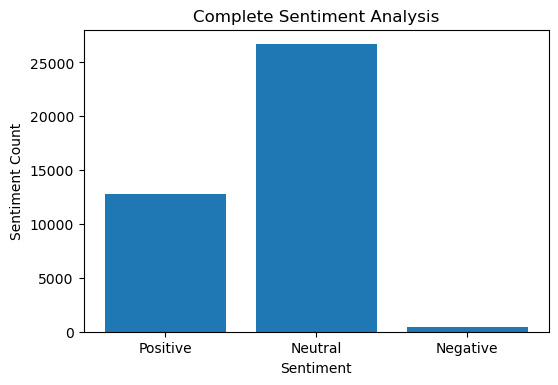

In [30]:
from textblob import TextBlob
df['sentiment'] = df['Comments'].apply(lambda x: TextBlob(x).sentiment[0])
df[['Comments','sentiment']].head()

positive = df[df['sentiment'] >= .2]
neutral = df[(df['sentiment'] > -.2) & (df['sentiment'] < .2)]
negative = df[df['sentiment'] <= -.2]

sentiment_count = [positive.count()[0], neutral.count()[0], negative.count()[0]]
sentiment_name = ['Positive', 'Neutral', 'Negative']

fig, axes = plt.subplots(figsize=(6, 4), dpi=100)
axes.bar(sentiment_name,sentiment_count)
axes.set_xlabel('Sentiment')
axes.set_ylabel('Sentiment Count')
axes.set_title('Complete Sentiment Analysis')
plt.show()

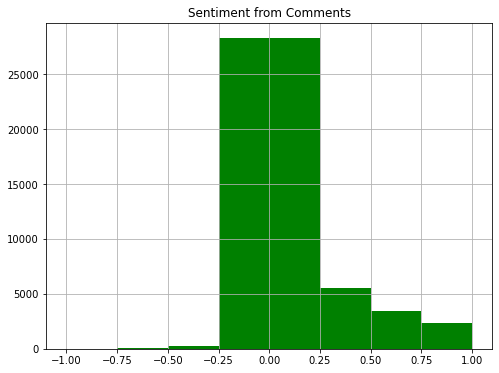

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
# Plot histogram of the polarity values
df['sentiment'].hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],ax=ax,color="green")
plt.title("Sentiment from Comments")
plt.show()

df_Friendly/Caring Rep


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


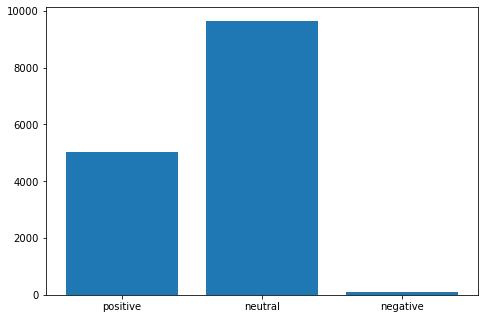

df_Ease to do Business


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


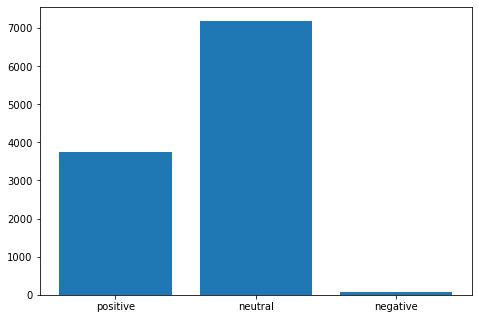

df_Representative Knowledge


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


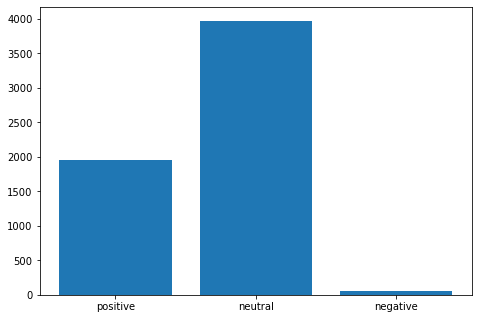

df_Time to Handle Request


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


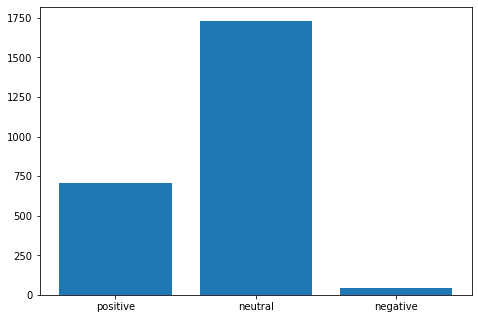

df_Price


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


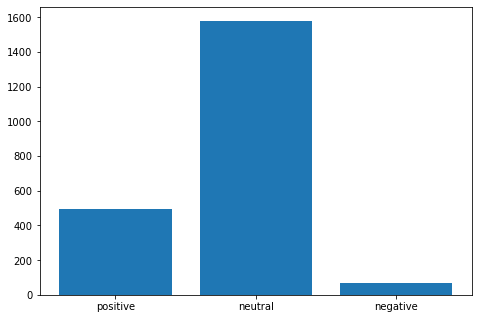

df_Other


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


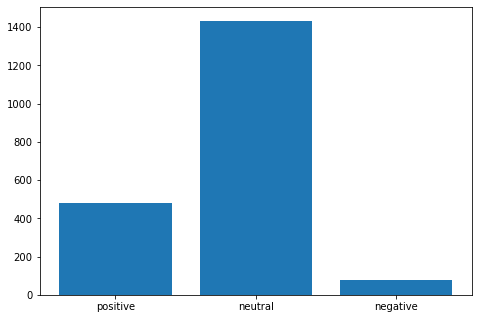

df_Product Offerings


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


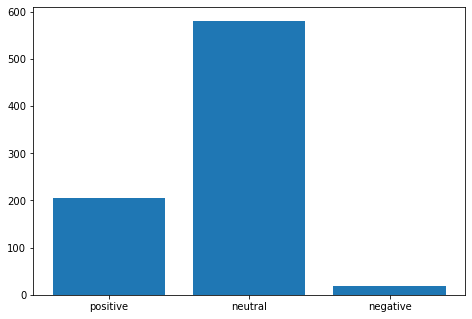

df_Online Chat Functionality


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


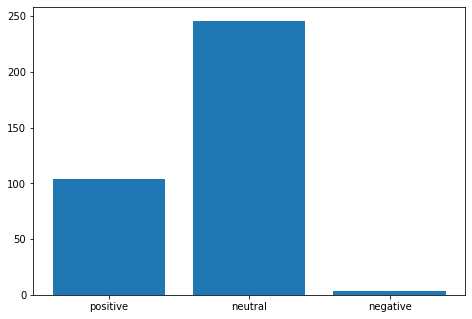

df_Web


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


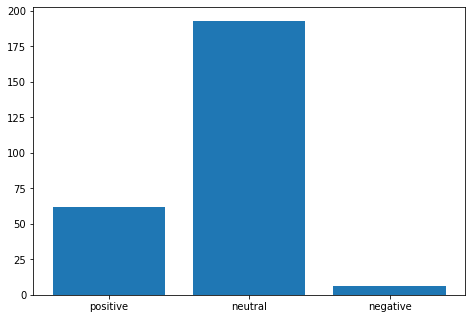

df_'-


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


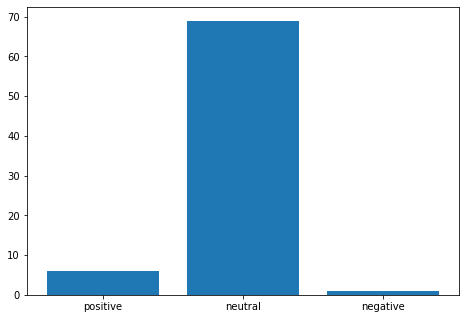

df_Mobile App


/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


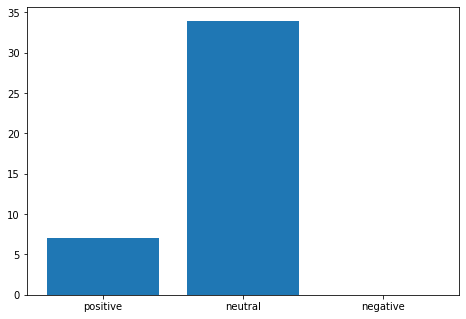

In [33]:
for reason in df['Reason'].value_counts().index:
    df_column = 'df_' + reason
    print(df_column)
    df_column = df.loc[df['Reason'] == reason]
    df_column['sentiment'] = df_column['Comments'].apply(lambda x: TextBlob(x).sentiment[0])
    
    positive = df_column.loc[df_column['sentiment'] >= .2]
    neutral = df_column.loc[(df_column['sentiment'] > -.2) & (df_column['sentiment'] < .2)]
    negative = df_column.loc[df_column['sentiment'] <= -.2]

    sentiment_count = [positive.count()[0], neutral.count()[0], negative.count()[0]]
    sentiment_name = ['positive', 'neutral', 'negative']
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(sentiment_name,sentiment_count)
    plt.show()

# Clean Comments

This step needs to be done in order for the next steps to work properly. I couldn't download the words package!

# Postivie Comments

In [34]:
df_sorted_descending = df.sort_values(by=['sentiment'], ascending = False)
df_sorted_descending[['Comments', 'sentiment']].head(20) 

,Comments,sentiment
34563,Excellent customer service.,1.0
20624,Excellent customer service from representative,1.0
6974,Amica always provides the best service and val...,1.0
14097,"Your rep, Heidi (Taunton) was wonderfully help...",1.0
6973,Would always recommend Amica based on excellen...,1.0
1743,I have always had excellent service.,1.0
20602,Best in town!,1.0
14106,Excellent assistance.,1.0
1739,Always impressed with the representatives know...,1.0
20599,Best customer service ON THE PLANET!,1.0


### Most Common Postivie Words

In [37]:
freq = pd.Series(' '.join(df['Comments']).split()).value_counts()[:30]
freq

'-           19099
and          15572
I            14365
to           13662
the          11645
a            8479 
with         6757 
my           6140 
have         5947 
was          5788 
Amica        5470 
of           5289 
for          5170 
is           4013 
been         3805 
service      3717 
in           3475 
that         3174 
always       3171 
very         2897 
had          2766 
customer     2722 
are          2566 
on           2541 
not          2308 
insurance    2172 
me           2060 
The          2038 
would        1894 
it           1860 
dtype: int64

# Negative Comments

In [35]:
pd.set_option('display.max_colwidth', -1)
df_sorted_ascending = df.sort_values(by=['sentiment'])
df_sorted_ascending[['Comments', 'sentiment']].head(20)   

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Comments,sentiment
10880,the amount being charged for my umbrella policy is outrageous.,-1.0000
14700,Kids I think over $5000 a year for insurance is absolutely insane .,-1.0000
20689,Already discussed with Manager. My daughter had a horrible experience,-1.0000
4925,Phone system to call in was miserable,-1.0000
1964,Customer service was terrible or unavailable...and I thought that's what Amica was know for.,-1.0000
2178,Amica is bad ass!!,-1.0000
5517,Will recommend you but your wait time on the phone is awful!,-1.0000
5857,Disappointed that you don't offer discounts to seniors!,-0.9375
21579,Never had a bad experience with amica!,-0.8750
667,I would always recommend Amica. Always a pleasure to deal with. I have NEVER had a bad experience with Amica!,-0.8750


# Other Comments

In [36]:
df_other = df[df['Reason'] == 'Other']
df_other.head()

,SCS ID,SCS Respid,Date,Reason,SCS Primary Reason Other,Comments,word_count,sentiment
10,12,369018,1/26/2017,Other,"agent suggested I wanted free insurance, dumb","I asked how long I had to report or add a new car purchase. Do I have 30 days? Agent said that policy would relate back to date of purchase and there would be no free insurance. Doh. I know that and to suggest that I'm looking for ""free insurance"" is just plain stupid, insulting. I asked how long I have to add the car and her comment I thought was insulting. She also suggested that the sales price of a house has nothing to do with the rebuilding cost. I don't agree with that, obviously homes sell for more that have more options and cost more to build. Another dumb comment.",119,-0.110195
47,49,369302,1/27/2017,Other,"Relying on county records for original square feet of my house, instead of my own records. Thereby under insuring my house.",I just did in the previous dialogue box.,8,-0.166667
59,61,369367,1/27/2017,Other,all of the above,Amica is the best hands down,6,0.422222
73,75,369515,1/28/2017,Other,I never do a 10,Because I indicated a 9 does not mean I would not recommend AMICA. I have recommended AMICA and will do so again. Too often corporations are offended if one does not assign a 10 to a given category. I do not very often rate anything a 10 if I am well satisfied I use 9.,55,0.185417
96,98,369706,1/27/2017,Other,totally wrong on billing,Can't fix incorrect information on bill,6,0.000000
